## Project: Wrangle and Analyze "WeRateDogs" Data

### Table of contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering</a></li>
<li><a href="#assess">Assessing</a></li>
<li><a href="#clean">Cleaning</a></li>
<li><a href="#storing">Saving the cleaned data</a></li>
<li><a href="#conclusions">Insights and Conclusions</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
### Introduction

The goal of this project is to apply the concepts learned in the Data Wrangling course of the Data Analyst Nanodegree. For this purpose, we will use data from the Twitter account WeRateDogs, which rates people's dogs with humorous comments about them.  

The data to be gathered consists of three parts, as described below:

1) The WeRateDogs Twitter archive, in a `.csv` file provided by Udacity (`twitter_archive_enhanced.csv`)

2) Tweet image predictions, i.e., the results of classification as to what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (`image_predictions.tsv`) is hosted on Udacity's servers and should be downloaded programmatically using the `requests` library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3) Each tweet's retweet count and favorite ("like") count. This will be done by querying the Twitter API for each tweet's JSON data using Python's Tweepy library and storing this data in a file called `tweet-json.txt` file.

<a id='gather'></a>
### Gathering

In this section we'll gather the three pieces of the data mentioned in the Introduction. Each of them will be stored in a Pandas data frame and displayed visually.

In [127]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import requests

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

%matplotlib inline

1) The "WeRateDogs" twitter archive was provided by Udactiy in the `.csv` file `twitter_archive_enhanced.csv`, included in the current directory. In the following we'll load its data into a Pandas data frame named `df_twitter_archive`:

In [128]:
df_twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2) The data for tweet images predictions is hosted on Udacity's servers. In the following it'll be downloaded using the `requests` library and URL provided in the Introduction section. Then, the data will be saved into a file `image_predictions.tsv` and read into a Pandas data frame named `df_image_predictions`.

In [129]:
# define url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

# send request to get data and save response
response = requests.get(url)

# write response in file
with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

# save to data frame 
df_image_predictions = pd.read_csv("image_predictions.tsv", sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3) In order to gather the data regarding retweet count and favorite count,  Python's library `tweepy` should be used to query Twitter's API. In this case, because of  mobile verification issues the following code was provided by Udactiy, together with the `tweet-json.txt` file containing the obtained data, also included in the current directory. 

In [130]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# tweet_ids = df_twitter_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()

# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [131]:
# Code to read json file and save its info to a pandas data frame
json_data = []

# Read json file line by line
with open("tweet-json.txt", "r") as file:
    for line in file:
        tweet = json.loads(line)        
        json_data.append({
            "tweet_id": tweet["id"],
            "retweet_count": tweet["retweet_count"],
            "favorite_count": tweet["favorite_count"],            
        })               
                
            
df_twitter_api = pd.DataFrame(json_data, columns = ["tweet_id", "retweet_count", "favorite_count"])
df_twitter_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='assess'></a>
### Assessing

In this section, the three data frames will be assessed both visually and programmatically in order to identify at least two tidiness issues and eight quality issues. These will be addressed for data cleaning in the next section.

First we will evaluate the `df_twitter_archive` data frame. For this we'll make use of Pandas functions, as shown below:

In [132]:
# Take random sample of data
df_twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1132,728760639972315136,NaN,NaN,2016-05-07 01:37:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...","When you're way too slow for the ""down low"" po...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/728760639...,13,10,None,None,None,None,None
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518...,12,10,None,None,None,pupper,None
235,847606175596138505,NaN,NaN,2017-03-31 00:27:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cannon. He just heard something behind...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847606175...,12,10,Cannon,None,None,None,None
1923,674082852460433408,NaN,NaN,2015-12-08 04:27:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sagitariot Baklava mix. Loves her ne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674082852...,11,10,a,None,None,None,None
2017,672160042234327040,NaN,NaN,2015-12-02 21:06:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672160042...,8,10,Bubba,None,None,pupper,None


In [133]:
# Get info of columns - check for missing data
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [134]:
# Get amount of unique values in each column
df_twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [135]:
# Get data type of each column
df_twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [136]:
# Check for duplicates
df_twitter_archive.duplicated().sum()

0

In [137]:
# Inspect names of dogs
df_twitter_archive["name"].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
Toby           7
an             7
Daisy          7
Bailey         7
Leo            6
Dave           6
Rusty          6
Jack           6
Scout          6
Koda           6
Jax            6
Bella          6
Oscar          6
Milo           6
Stanley        6
Louis          5
            ... 
Schnozz        1
Blipson        1
Simba          1
Saydee         1
Dudley         1
Erik           1
Stu            1
Samsom         1
Joshwa         1
Dixie          1
Rooney         1
Enchilada      1
Gerbald        1
Jockson        1
Edgar          1
Ferg           1
Snickers       1
Tayzie         1
Dylan          1
Sora           1
Shnuggles      1
Loomis         1
Pip            1
Billy          1
Winifred       1
Koko           1
Lucia          1
Pilot         

In [138]:
df_twitter_archive["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [139]:
# Inspect values of numerators
df_twitter_archive["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [140]:
# Inspect values of denominators
df_twitter_archive["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [141]:
# Inspect values of source URLs
df_twitter_archive["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

We'll continue with the assessment of the `df_image_predictions` data frame:

In [142]:
# Take a random sample
df_image_predictions.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1427,772615324260794368,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True
421,674045139690631169,https://pbs.twimg.com/media/CVqwedgXIAEAT6A.jpg,1,robin,0.369661,False,rhinoceros_beetle,0.110607,False,European_fire_salamander,0.043178,False
1486,781955203444699136,https://pbs.twimg.com/media/CtoQGu4XgAQgv5m.jpg,1,pool_table,0.179568,False,dining_table,0.154396,False,microwave,0.033690,False
848,695446424020918272,https://pbs.twimg.com/media/Caa407jWwAAJPH3.jpg,1,basenji,0.748904,True,Cardigan,0.121102,True,Pembroke,0.111767,True
1460,778039087836069888,https://pbs.twimg.com/media/CswmaHmWAAAbdY9.jpg,2,German_shepherd,0.717776,True,malinois,0.111175,True,Norwegian_elkhound,0.058802,True
792,690728923253055490,https://pbs.twimg.com/media/CZX2SxaXEAEcnR6.jpg,1,kuvasz,0.422806,True,golden_retriever,0.291586,True,Great_Pyrenees,0.076189,True
1246,747594051852075008,https://pbs.twimg.com/media/Cl_80k5WkAEbo9m.jpg,1,basenji,0.389136,True,dingo,0.270226,False,Chihuahua,0.098939,True
963,705975130514706432,https://pbs.twimg.com/media/CcwgjmuXIAEQoSd.jpg,1,Staffordshire_bullterrier,0.587764,True,American_Staffordshire_terrier,0.281429,True,bull_mastiff,0.094798,True
578,678755239630127104,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,1,malamute,0.606654,True,Border_collie,0.193831,True,collie,0.048378,True
1289,751251247299190784,https://pbs.twimg.com/ext_tw_video_thumb/75125...,1,Walker_hound,0.178852,True,German_short-haired_pointer,0.115752,True,English_foxhound,0.113796,True


In [143]:
# Get column information - check for missing data
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [144]:
# Check for duplicates
df_image_predictions.duplicated().sum()

0

Finally, we'll investigate the `df_twitter_api` data frame:

In [145]:
# Take a random sample
df_twitter_api.sample(5)

,tweet_id,retweet_count,favorite_count
378,827653905312006145,3433,16983
1393,699801817392291840,1088,3345
1955,673583129559498752,403,1273
2215,668528771708952576,242,496
1712,680440374763077632,564,1583


In [146]:
# Get info about the columns - check for missing data
df_twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [147]:
# Check for duplicates
df_twitter_api.duplicated().sum()

0

The following issues could be detected from the assessment: 

#### Tidiness issues:

`df_twitter_archive`
* Unnecessary columns related to retweets and replies should be removed (`in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
* Dog stage columns should be combined into a single column (`doggo`, `floofer`, `pupper`, `puppo`) 
* The three data frames should be merged on `tweet_id`

#### Quality issues:
`df_twitter_archive`
* Entries corresponding to retweets or replies should be removed
* Data type of the `timestamp` column should be datetime, not string
* Some dog names are not correct (eg. "a", "quite", "such", "very"), all of them appear in lowercase
* Some dogs have more than one stage
* Some dogs stages are `NaN`
* A few rating denominator values are different from 10
* A few rating numerator values are out of the range 1-10
* The `expanded_urls` column has missing values

`df_image_predictions` 
* Some prediction names appear in uppercase, while others in lowercase
* In some prediction names there's an underscore instead of a whitespace to separate compound names


* Some tweets don't have associated images

<a id='clean'></a>
### Cleaning

Before addressing each issue, we'll make a copy of the three data frames where we'll store our changes:

In [148]:
# Make copy of each data frame
df_twitter_archive_clean = df_twitter_archive.copy()
df_image_predictions_clean = df_image_predictions.copy()
df_twitter_api_clean = df_twitter_api.copy()

In the following we'll address each issue mentioned in the previous section.

#### Define
* Remove entries corresponding to retweets or replies 

#### Code

In [149]:
# Delete retweets rows
df_twitter_archive_clean = df_twitter_archive_clean[pd.isnull(df_twitter_archive_clean['retweeted_status_id'])]

In [150]:
# Delete replies rows
df_twitter_archive_clean = df_twitter_archive_clean[pd.isnull(df_twitter_archive_clean['in_reply_to_status_id'])]

#### Test

In [151]:
# Check for retweets
sum(df_twitter_archive_clean["retweeted_status_id"].value_counts())

0

In [152]:
# Check for replies
sum(df_twitter_archive_clean["in_reply_to_status_id"].value_counts())

0

#### Define
* Delete unnecessary columns related to retweets and replies: `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`

#### Code

In [153]:
# Drop unnecessary columns
df_twitter_archive_clean = df_twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [154]:
# Check if columns were actually deleted
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### Define
* Change data type of `timestamp` column from string to datetime

#### Code

In [155]:
df_twitter_archive_clean["timestamp"] = pd.to_datetime(df_twitter_archive_clean["timestamp"])

#### Test

In [156]:
# Check data types of columns
df_twitter_archive_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Define
* Replace lowercase dog names with "None"

#### Code

In [157]:
# Assign "None" to values of dog names that match the regex '[a-z]+' (corresponding to lowercase names)
df_twitter_archive_clean['name'][df_twitter_archive_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [158]:
# Check for unique dog names
df_twitter_archive_clean["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola',
       'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

In [159]:
# Count values of each dog name
df_twitter_archive_clean["name"].value_counts()

None         707
Lucy          11
Charlie       11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Lola           8
Winston        8
Sadie          8
Daisy          7
Toby           7
Bailey         6
Stanley        6
Bella          6
Oscar          6
Bo             6
Koda           6
Jax            6
Milo           5
Louis          5
Scout          5
Dave           5
Rusty          5
Chester        5
Bentley        5
Leo            5
Buddy          5
Phil           4
Oakley         4
            ... 
Chef           1
Brutus         1
Dug            1
Genevieve      1
Koko           1
Billy          1
Rumble         1
Logan          1
Eve            1
Leonidas       1
Cupid          1
Severus        1
Stu            1
Kobe           1
Dixie          1
Rooney         1
Enchilada      1
Gerbald        1
Jockson        1
Edgar          1
Moreton        1
Snickers       1
Tayzie         1
Joshwa         1
Dylan          1
Shnuggles      1
Loomis         1
Tommy         

#### Define
* Combine dog stage columns (`doggo`, `floofer`, `pupper`, `puppo`) into a single column `dog_stage`. Since the possible values for dog stages were originally extracted from the `text` column, we can actually extract them again and assign the corresponding value in the new column `dog_stage`. Then we can drop the `doggo`, `floofer`, `pupper` and `puppo` columns. 
* This will also solve the quality issue "Some dogs have more than one stage"

#### Code

In [160]:
# Extract the possible stages from the "text" column and assign to new column "dog_stage"
df_twitter_archive_clean["dog_stage"] = df_twitter_archive_clean["text"].str.extract("(doggo|floofer|pupper|puppo)")

In [161]:
# Drop columns
df_twitter_archive_clean = df_twitter_archive_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1)

#### Test

In [162]:
# Check to see if the new column has the correct values
df_twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1787,677565715327688705,2015-12-17 19:07:09,"<a href=""http://twitter.com/download/iphone"" r...",Contortionist pup here. Inside pentagram. Clea...,https://twitter.com/dog_rates/status/677565715...,6,10,None,NaN
1403,699413908797464576,2016-02-16 02:04:04,"<a href=""http://twitter.com/download/iphone"" r...",Meet Miley. She's a Scandinavian Hollabackgirl...,https://twitter.com/dog_rates/status/699413908...,11,10,Miley,NaN
1811,676819651066732545,2015-12-15 17:42:34,"<a href=""http://twitter.com/download/iphone"" r...",Watch out Airbud. This pupper is also good at ...,https://twitter.com/dog_rates/status/676819651...,12,10,None,pupper
1387,700505138482569216,2016-02-19 02:20:14,"<a href=""http://twitter.com/download/iphone"" r...",This is Kaia. She's just cute as hell. 12/10 I...,https://twitter.com/dog_rates/status/700505138...,12,10,Kaia,NaN
1322,706291001778950144,2016-03-06 01:31:11,"<a href=""http://twitter.com/download/iphone"" r...",When you're just relaxin and having a swell ti...,https://twitter.com/dog_rates/status/706291001...,11,10,None,NaN


In [163]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             353 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.8+ KB


#### Define
* Replace "NaN" dog stages with "None"
* Remove the 3 entries of `expanded_urls` that have null values

With these two steps none of the columns in the data frame will have null values

#### Code

In [164]:
# Replace "NaN" values of the "dog_stage" column with "None"
df_twitter_archive_clean["dog_stage"] = df_twitter_archive_clean["dog_stage"].replace(np.nan, "None")

In [165]:
# Delete entries where "expanded_urls" has null values
df_twitter_archive_clean.dropna(axis=0, how="any", subset=["expanded_urls"], inplace=True)

#### Test

In [166]:
# Check data frame info to verify there are no null values in any entry
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
dog_stage             2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 163.6+ KB


In [167]:
df_twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
77,877736472329191424,2017-06-22 03:54:17,"<a href=""http://twitter.com/download/iphone"" r...",This is Aja. She was just told she's a good do...,https://twitter.com/dog_rates/status/877736472...,13,10,Aja,None
1656,683357973142474752,2016-01-02 18:43:31,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",https://twitter.com/dog_rates/status/683357973...,10,10,None,None
1860,675489971617296384,2015-12-12 01:38:53,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,https://twitter.com/dog_rates/status/675489971...,10,10,None,None
1714,680440374763077632,2015-12-25 17:30:01,"<a href=""http://twitter.com/download/iphone"" r...",Merry Christmas. My gift to you is this tiny u...,https://twitter.com/dog_rates/status/680440374...,11,10,None,None
2240,667924896115245057,2015-11-21 04:37:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminy. He has always wanted to be a c...,https://twitter.com/dog_rates/status/667924896...,9,10,Jiminy,None


In [168]:
# Check possible values of "dog_stage" column
df_twitter_archive_clean["dog_stage"].value_counts()

None       1742
pupper      239
doggo        80
puppo        29
floofer       4
Name: dog_stage, dtype: int64

#### Define
* Remove entries with rating denominator different from 10

#### Code

In [169]:
# Apply filter to data frame - keep only rating denominators equals to 10
df_twitter_archive_clean = df_twitter_archive_clean[df_twitter_archive_clean["rating_denominator"] == 10]

#### Test

In [170]:
# Check possible values for rating denominator
df_twitter_archive_clean["rating_denominator"].value_counts()

10    2077
Name: rating_denominator, dtype: int64

#### Define
* Remove rating numerator values outside the range 1-14. According to the `WeRateDogs` Wikipedia page [1], dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10". We will consider that values between 1-14 are correct, and the few exceptions that lie outside this range are considered outliers and therefore we'll remove them. 

#### Code

In [171]:
# Apply filter to data frame - keep only rating numerators in the range 1-14
df_twitter_archive_clean = df_twitter_archive_clean[(df_twitter_archive_clean["rating_numerator"] >= 1) & (df_twitter_archive_clean["rating_numerator"] <= 14)]

#### Test

In [172]:
# Check if possible values for rating_numerator are within the desired range
df_twitter_archive_clean["rating_numerator"].value_counts()

12    485
10    434
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
Name: rating_numerator, dtype: int64

In [173]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_stage             2071 non-null object
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 161.8+ KB


In [174]:
df_twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1171,720415127506415616,2016-04-14 00:55:25,"<a href=""http://twitter.com/download/iphone"" r...",Garden's coming in nice this year. 10/10 https...,https://twitter.com/dog_rates/status/720415127...,10,10,None,None
271,841077006473256960,2017-03-13 00:02:39,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None
2018,672139350159835138,2015-12-02 19:44:43,"<a href=""http://twitter.com/download/iphone"" r...",This pup has a heart on its ass and that is do...,https://twitter.com/dog_rates/status/672139350...,12,10,None,None
567,802239329049477120,2016-11-25 19:55:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Loki. He'll do your taxes for you. Can...,https://twitter.com/dog_rates/status/802239329...,12,10,Loki,puppo
225,849051919805034497,2017-04-04 00:12:06,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. Kevin doesn't give a single h*c...,https://twitter.com/dog_rates/status/849051919...,13,10,Kevin,None


#### Define
* Apply "lower" method to make all prediction names lowercase
* Replace underscore in prediction names with whitespace

#### Code

In [175]:
# Replace values in prediction columns p1, p2 and p3 with the corrections
df_image_predictions_clean["p1"] = df_image_predictions_clean["p1"].str.replace('_', ' ').str.lower()
df_image_predictions_clean["p2"] = df_image_predictions_clean["p2"].str.replace('_', ' ').str.lower()
df_image_predictions_clean["p3"] = df_image_predictions_clean["p3"].str.replace('_', ' ').str.lower()

#### Test

In [176]:
# Check names of "p1" predictions
df_image_predictions_clean["p1"].value_counts()

golden retriever             150
labrador retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy poodle                    39
pomeranian                    38
malamute                      30
cocker spaniel                30
french bulldog                26
miniature pinscher            23
chesapeake bay retriever      23
seat belt                     22
german shepherd               20
siberian husky                20
staffordshire bullterrier     20
cardigan                      19
web site                      19
teddy                         18
eskimo dog                    18
shetland sheepdog             18
maltese dog                   18
beagle                        18
shih-tzu                      17
rottweiler                    17
lakeland terrier              17
kuvasz                        16
italian greyhound             16
          

In [177]:
# Check names of "p2" predictions
df_image_predictions_clean["p2"].value_counts()

labrador retriever                104
golden retriever                   92
cardigan                           74
chihuahua                          44
pomeranian                         42
french bulldog                     41
chesapeake bay retriever           41
toy poodle                         37
cocker spaniel                     34
miniature poodle                   33
siberian husky                     33
beagle                             28
collie                             27
pembroke                           27
eskimo dog                         27
kuvasz                             26
italian greyhound                  22
pekinese                           21
american staffordshire terrier     21
chow                               20
miniature pinscher                 20
toy terrier                        20
samoyed                            20
malinois                           20
boston bull                        19
norwegian elkhound                 19
staffordshir

In [178]:
# Check names of "p3" predictions
df_image_predictions_clean["p3"].value_counts()

labrador retriever                79
chihuahua                         58
golden retriever                  48
eskimo dog                        38
kelpie                            35
kuvasz                            34
chow                              32
staffordshire bullterrier         32
beagle                            31
cocker spaniel                    31
toy poodle                        29
pekinese                          29
pomeranian                        29
chesapeake bay retriever          27
great pyrenees                    27
pembroke                          27
french bulldog                    26
malamute                          26
american staffordshire terrier    24
cardigan                          23
pug                               23
basenji                           21
toy terrier                       20
bull mastiff                      20
siberian husky                    19
shetland sheepdog                 17
boston bull                       17
d

#### Define
* Merge the three data frames `df_twitter_archive_clean`,  `df_image_predictions_clean` and `df_twitter_api_clean` on `tweet_id` into `df_twitter_master` data frame

#### Code

In [179]:
# Merge the three data frames
df_twitter_master = pd.merge(left=df_twitter_archive_clean, right=df_twitter_api_clean, how='left', on='tweet_id')
df_twitter_master = pd.merge(left=df_twitter_master, right=df_image_predictions_clean, how='left', on='tweet_id')

#### Test

In [180]:
df_twitter_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,...,1.0,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,...,1.0,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,8964,...,1.0,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,9774,...,2.0,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


In [181]:
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 22 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2071 non-null object
rating_numerator      2071 non-null int64
rating_denominator    2071 non-null int64
name                  2071 non-null object
dog_stage             2071 non-null object
retweet_count         2071 non-null int64
favorite_count        2071 non-null int64
jpg_url               1948 non-null object
img_num               1948 non-null float64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null object
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null object
p3                    1948 non-null object
p3_conf               1948 

#### Define
* It seems some of the tweets don't have images associated, so we will remove them

#### Code

In [182]:
# Drop null entries
df_twitter_master.dropna(axis = 0, inplace=True)

#### Test

In [183]:
# Check data frame info to verify there are no null values
df_twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 2070
Data columns (total 22 columns):
tweet_id              1948 non-null int64
timestamp             1948 non-null datetime64[ns]
source                1948 non-null object
text                  1948 non-null object
expanded_urls         1948 non-null object
rating_numerator      1948 non-null int64
rating_denominator    1948 non-null int64
name                  1948 non-null object
dog_stage             1948 non-null object
retweet_count         1948 non-null int64
favorite_count        1948 non-null int64
jpg_url               1948 non-null object
img_num               1948 non-null float64
p1                    1948 non-null object
p1_conf               1948 non-null float64
p1_dog                1948 non-null object
p2                    1948 non-null object
p2_conf               1948 non-null float64
p2_dog                1948 non-null object
p3                    1948 non-null object
p3_conf               1948 

<a id='storing'></a>
### Saving the cleaned data

Now that our data is cleaned, we will save the `df_twitter_master` data frame in the `twitter_archive_master.csv` file. 

In [184]:
# Save our cleaned dataframe in twitter_archive_master.csv
df_twitter_master.to_csv('twitter_archive_master.csv', index=False)

<a id='conclusions'></a>
### Insights and Conclusions

Based on our clean data, we'll pose some questions in order to get some insights about the information that `WeRateDogs` offers. 

#### Q1: What are the 15 most common dog breeds in the dataset?

To answer this we'll investigate the values of prediction P1, which seems to be the most reliable in general.

golden retriever            134
labrador retriever           91
pembroke                     88
chihuahua                    78
pug                          54
chow                         41
samoyed                      40
pomeranian                   37
toy poodle                   37
malamute                     29
cocker spaniel               27
french bulldog               26
chesapeake bay retriever     23
miniature pinscher           21
german shepherd              20
Name: p1, dtype: int64


Text(0.5,1,'Fifteen most common dog breeds')

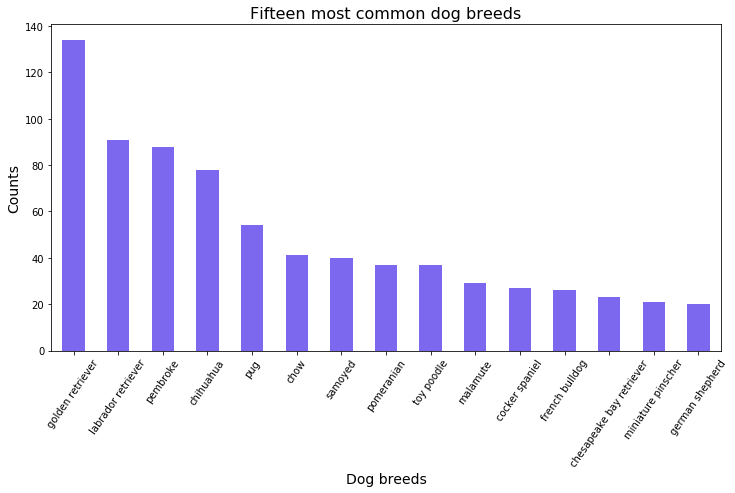

In [185]:
# Check value counts of 15 most common dog names (only include values of P1 where p1_dog is True)
print(df_twitter_master.query("p1_dog == True")["p1"].value_counts()[0:15])

# Bar plot
plt.figure(figsize=(12,6)) 
df_twitter_master.query("p1_dog == True")["p1"].value_counts()[0:15].plot.bar(color="mediumslateblue", rot=55)
plt.xlabel("Dog breeds", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.title("Fifteen most common dog breeds", fontsize=16)

As it can be seen, the most common dog breed predicted by the neural network in this dataset is by far golden retriever.

#### Q2: Is there a correlation between Twitter favorites (likes) and retweets?

We'll plot the two variables `favorite_count` and `retweet_count` together in a scatter plot and then calculate Pearson's correlation coefficient.

Text(0.5,1,'Relationship between favorites and retweets')

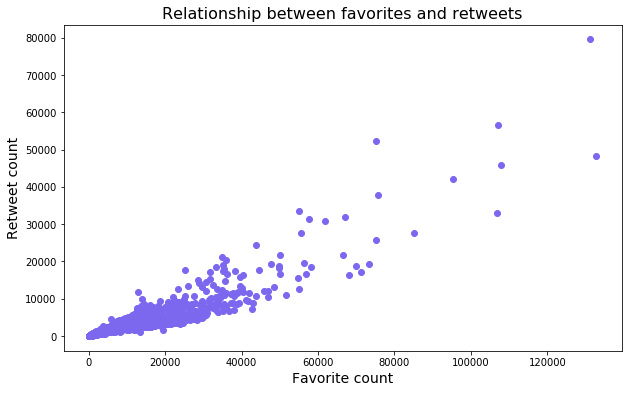

In [186]:
# Scatter plot between favorite count and retweet count
plt.figure(figsize=(10,6)) 
plt.scatter(x=df_twitter_master["favorite_count"], y=df_twitter_master["retweet_count"], color="mediumslateblue");
plt.xlabel("Favorite count", fontsize=14)
plt.ylabel("Retweet count", fontsize=14)
plt.title("Relationship between favorites and retweets",fontsize=16)

In [187]:
# Calculate pairwise correlation coeficient
df_twitter_master['favorite_count'].corr(df_twitter_master['retweet_count'])

0.91342507815212126

The correlation coefficient we obtained is consistent with what is observed in the graph. There seems to be a correlation between faving (liking) a tweet and retweeting it.

#### Q3: What are the 15 most common dog names? 

We'll plot in a bar chart the 15 dog names that appear most frequently in the dataset.

Charlie    11
Lucy       10
Oliver     10
Cooper     10
Tucker      9
Penny       9
Winston     8
Sadie       8
Lola        7
Daisy       7
Toby        7
Bo          6
Jax         6
Koda        6
Bella       6
Name: name, dtype: int64


Text(0.5,1,'Fifteen most common dog names')

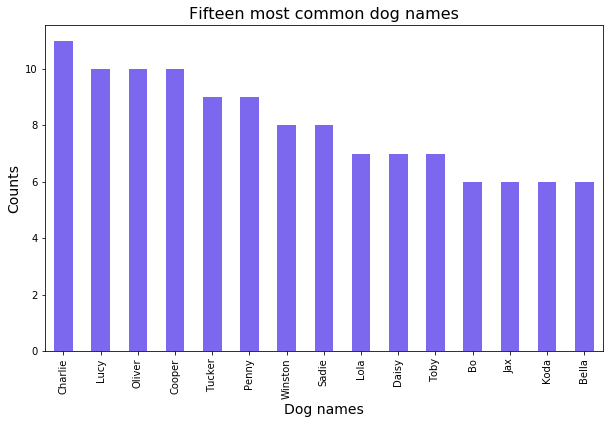

In [188]:
# Check value counts of 15 most common dog names
print(df_twitter_master["name"].value_counts()[1:16])

# Bar plot
plt.figure(figsize=(10,6)) 
df_twitter_master["name"].value_counts()[1:16].plot.bar(color="mediumslateblue")
plt.xlabel("Dog names", fontsize= 14)
plt.ylabel("Counts", fontsize=14)
plt.title("Fifteen most common dog names", fontsize =16)

We see that the most common dog name for this cleaned dataset is "Charlie".

#### Q4: How is the distribution of dog stages?

Finally, we'll plot in a bar chart the number of dogs corresponding to each stage: `doggo`, `floofer`, `pupper` and `puppo`.

pupper     214
doggo       70
puppo       28
floofer      3
Name: dog_stage, dtype: int64


Text(0.5,1,'Amount of dogs in each stage')

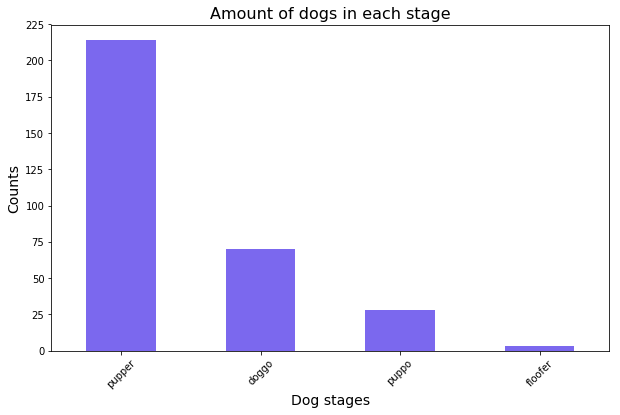

In [189]:
# Check value counts of dog stages (do not include Nones)
print(df_twitter_master["dog_stage"].value_counts()[1:])

# Bar plot
plt.figure(figsize=(10,6)) 
df_twitter_master["dog_stage"].value_counts()[1:5].plot.bar(color="mediumslateblue",rot=45)
plt.xlabel("Dog stages", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.title("Amount of dogs in each stage", fontsize=16)

The most common dog stage by far is `pupper`, while the least common is `floofer`.

<a id='references'></a>
### References

[1] "WeRateDogs" Wikipedia page https://en.wikipedia.org/wiki/WeRateDogs